# NYC Hate Crime Tracking

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import seaborn as sns

/Users/rjasinski/py3/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def format_month_and_crime_count(df):
    df = pd.DataFrame(df['Month'].value_counts().sort_index())
    df['Crime Count'] = df['Month']
    df['Month'] = df.index
    df.reset_index(drop=True, inplace=True)
    return df

def sorting_for_worst_offending_area_group(row):
    if row['Borough'] == worst_offending_area and row['Bias'] == most_impacted_group:
        return 1
    else:
        return 0

In [3]:
#Set intial color pallette
sns.set()
sns.color_palette("crest", as_cmap=True)

In [4]:
main = pd.read_csv('NYPD_Hate_Crimes.csv')
main_copy = main.copy()

In [5]:
main.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Other Motive Description,Arrest Date,Arrest Id
0,201904600132799,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation,NaN,02/08/2019,B19606200
1,201904800157499,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610772
2,201904800154599,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610788
3,201904800159299,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610788
4,201904200333499,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-ISLAMIC(MUSLIM),Religion/Religious Practice,NaN,05/10/2019,B19620156


# Slim the data down and clean up what we are using - Data Manipulation

In [6]:
main = main[['Month Number',
             'Record Create Date',
             'Patrol Borough Name',
             'County',
             'Law Code Category Description',
             'Bias Motive Description',
             'Offense Category',
             'Arrest Date',
            'Complaint Year Number']]

In [7]:
main.rename(columns={'Month Number': 'Month',
                     'Patrol Borough Name': 'Borough',
                     'Law Code Category Description': 'Crime Type',
                     'Bias Motive Description': 'Bias'}, inplace=True)

In [8]:
main2019 = main[main['Complaint Year Number'] == 2019]
main = main[main['Complaint Year Number'] == 2020]

In [9]:
main.head()

,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date,Complaint Year Number
13,2,02/06/2020,PATROL BORO BRONX,BRONX,MISDEMEANOR,ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation,02/06/2020,2020
14,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020,2020
15,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020,2020
16,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020,2020
17,4,04/12/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,04/29/2020,2020


# How are crimes spread by borough? - Rack and stack the data

In [10]:
crimes_by_burough = main[['Borough', 'Offense Category']] 

<AxesSubplot:xlabel='Borough'>

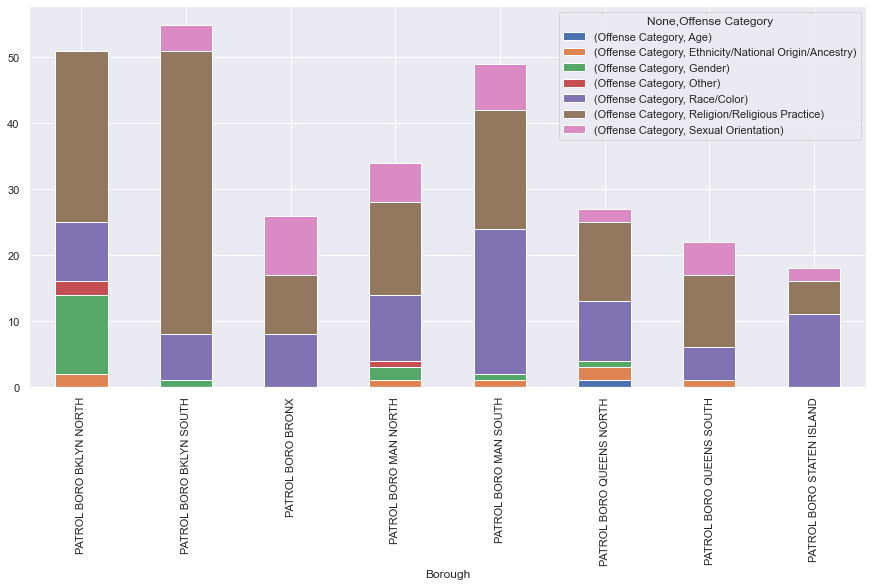

In [11]:
crimes_by_burough.groupby(['Borough', 'Offense Category']).agg({'Offense Category': 'count'}).unstack().plot(kind='bar', stacked=True, figsize = (15,7))

## Top 5 Borough Crime Distribution

In [12]:
ranked_borough_by_crime = main.groupby('Borough', as_index=False).agg({"Bias": "count"}).rename(columns={'Bias': 'Crime Count'}).sort_values('Crime Count', ascending=False)
ranked_borough_by_crime_top = ranked_borough_by_crime.head(5)
ranked_borough_by_crime_top.head()

,Borough,Crime Count
1,PATROL BORO BKLYN SOUTH,55
0,PATROL BORO BKLYN NORTH,51
4,PATROL BORO MAN SOUTH,49
3,PATROL BORO MAN NORTH,34
5,PATROL BORO QUEENS NORTH,27


<AxesSubplot:>

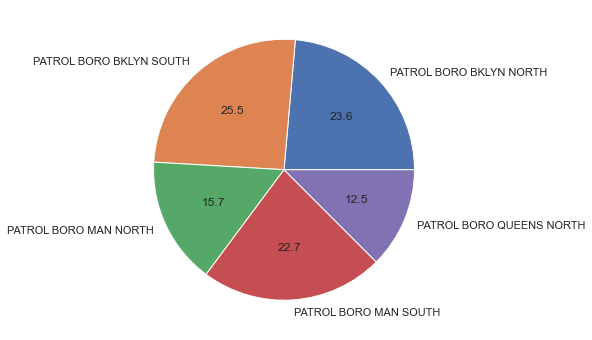

In [13]:
# Take the top 5 from above, use it to get all our lines from main data source and graph that beautiful data
main[main['Borough'].isin(list(ranked_borough_by_crime_top['Borough']))].groupby(['Borough']).size().plot.pie(figsize=(6, 6), ylabel='', autopct="%.1f",)

## Highest Crime Over the Year - Trend Line

In [14]:
# Rack and stack crime types, sort by count, pull top value off to use later
highest_crime_type = main.groupby('Offense Category', as_index=False).agg({"Borough": "count"}).sort_values('Borough',ascending=False).head(1)
highest_crime_type_key = highest_crime_type['Offense Category'].iloc[0]
print(highest_crime_type_key)
highest_crime_df = main[main['Offense Category'] == highest_crime_type_key]
highest_crime_df.head()

Religion/Religious Practice


,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date,Complaint Year Number
17,4,04/12/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,04/29/2020,2020
80,1,01/01/2020,PATROL BORO BKLYN NORTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,01/01/2020,2020
81,1,01/21/2020,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,01/21/2020,2020
83,2,02/08/2020,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,02/11/2020,2020
84,2,02/28/2020,PATROL BORO BKLYN NORTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,02/28/2020,2020


In [15]:
highest_crime_graph_df = format_month_and_crime_count(highest_crime_df)
highest_crime_graph_df

,Month,Crime Count
0,1,18
1,2,18
2,3,10
3,4,7
4,5,8
5,6,7
6,7,15
7,8,5
8,9,11
9,10,14


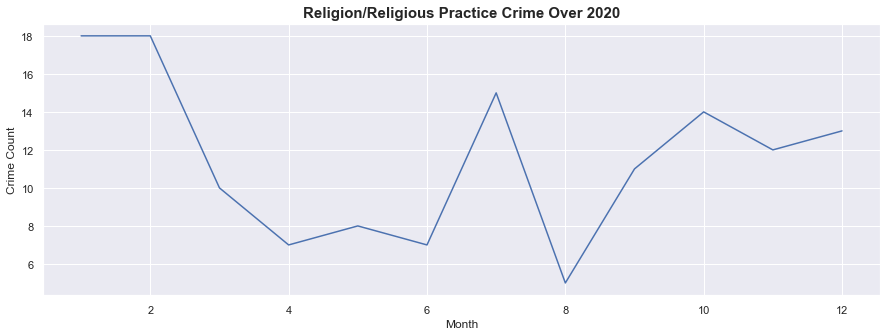

In [16]:
#Now Plot it out ... East side walk it out, west side walk it out...UNK say Plot it out!!!
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
sns.lineplot(x='Month', y='Crime Count', data=highest_crime_graph_df).set_title(f'{highest_crime_type_key} Crime Over 2020', fontdict= { 'fontsize':15, 'fontweight':'bold'})
plt.show()

## How Does This Look YoY? - Are Police Cracking Down?

In [17]:
# First pull last year for same crime and format properly
prior_year_worst_crime = main2019.copy()
prior_year_worst_crime = format_month_and_crime_count(prior_year_worst_crime)

In [18]:
#join up the data
yoy_analysis = highest_crime_graph_df.merge(prior_year_worst_crime,left_on='Month', right_on='Month', how='inner')

In [19]:
yoy_analysis.rename(columns={
    'Crime Count_x':'2020',
    'Crime Count_y':'2019',
},inplace=True)
yoy_analysis

,Month,2020,2019
0,1,18,39
1,2,18,33
2,3,10,53
3,4,7,26
4,5,8,34
5,6,7,38
6,7,15,29
7,8,5,45
8,9,11,32
9,10,14,45


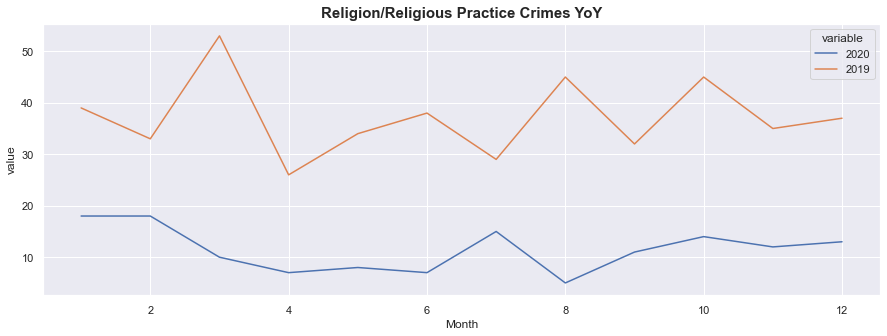

In [20]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
sns.lineplot(x='Month', y='value', hue='variable', 
             data=pd.melt(yoy_analysis, 'Month')).set_title(f'{highest_crime_type_key} Crimes YoY', fontdict= { 'fontsize':15, 'fontweight':'bold'})
plt.show()

# Who is impacted most by this crime?

In [21]:
highest_crime_df.head()

,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date,Complaint Year Number
17,4,04/12/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,04/29/2020,2020
80,1,01/01/2020,PATROL BORO BKLYN NORTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,01/01/2020,2020
81,1,01/21/2020,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,01/21/2020,2020
83,2,02/08/2020,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,02/11/2020,2020
84,2,02/28/2020,PATROL BORO BKLYN NORTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,02/28/2020,2020


In [22]:
most_impacted_group = highest_crime_df.groupby('Bias').agg({'Crime Type': 'count'}).sort_values(by=['Crime Type'], ascending=False).index[0]
print(most_impacted_group)

ANTI-JEWISH


## Where?

In [23]:
worst_offending_area = main[main['Bias'] == most_impacted_group].groupby(['Borough']).agg({'Bias':'count'}).sort_values(by=['Bias'], ascending=False).index[0]
print(worst_offending_area)

PATROL BORO BKLYN SOUTH


# How has this changed in 2020? aka Lets Make a Histogram

In [24]:
change_analysis = main.copy()
change_analysis['check'] = main.apply(sorting_for_worst_offending_area_group, axis =1)
change_analysis = change_analysis[change_analysis['check'] == 1]
change_analysis.drop(columns=['check'], inplace=True, axis = 0)
change_analysis['Day Of Year'] = pd.to_datetime(change_analysis['Record Create Date']).dt.dayofyear

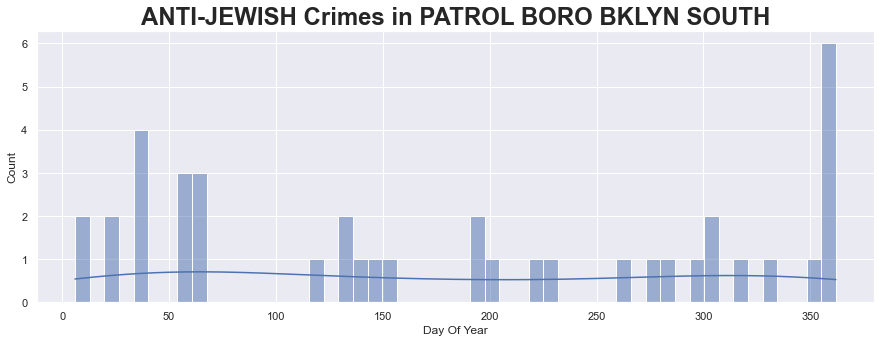

In [25]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
sns.histplot(change_analysis['Day Of Year'], ax=ax, kde=True, bins=int(np.floor((365/7)))).set_title(f'{most_impacted_group} Crimes in {worst_offending_area}', fontdict= { 'fontsize': 24, 'fontweight':'bold'})
plt.show()

In [26]:
#Created my own CSV to compare to this analysis
holidays = pd.read_csv('Jewish Holidays 2020.csv')

In [27]:
holidays['Day Of Year'] = pd.to_datetime(holidays['DATE']).dt.dayofyear

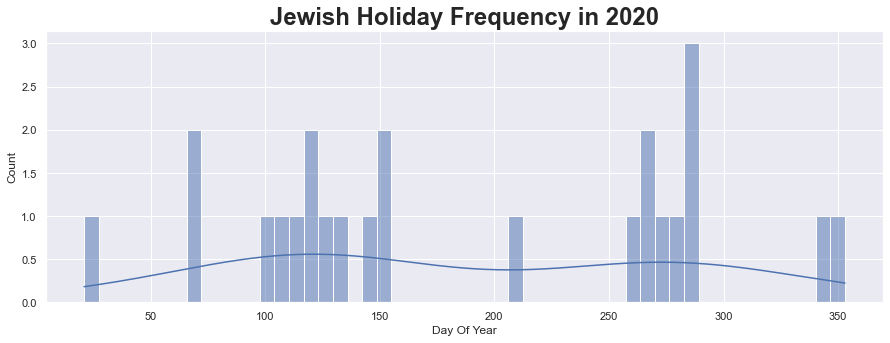

In [28]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
sns.histplot(holidays['Day Of Year'], ax=ax, kde=True, bins=int(np.floor((365/7)))).set_title(f'Jewish Holiday Frequency in 2020', fontdict= { 'fontsize': 24, 'fontweight':'bold'})
plt.show()

## Any Correlation?  - Merge and Stacked Graph

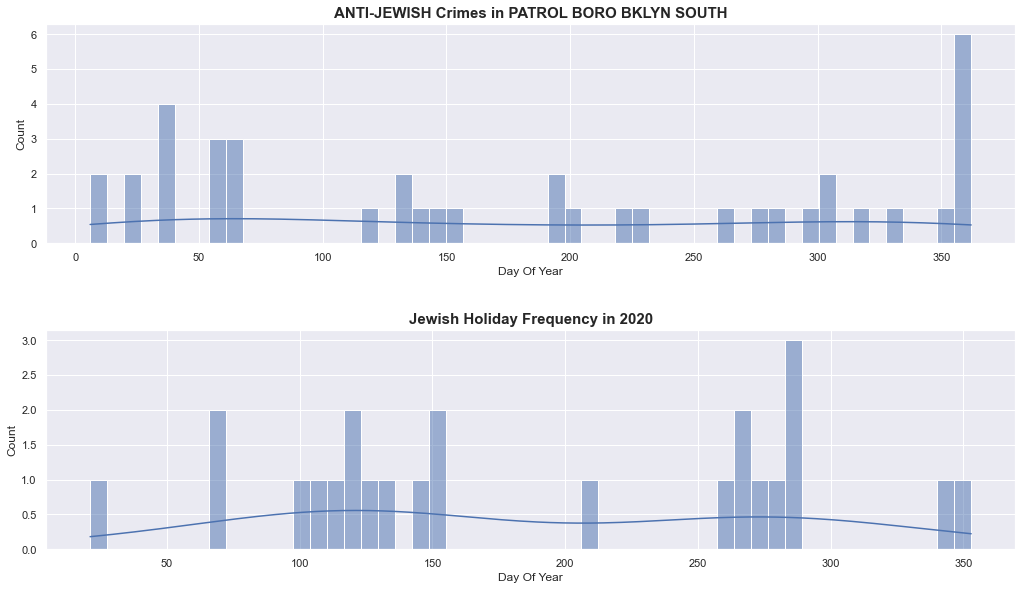

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 9))
sns.histplot(change_analysis['Day Of Year'], ax=ax1, kde=True, bins=int(np.floor((365/7)))).set_title(f'{most_impacted_group} Crimes in {worst_offending_area}', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
sns.histplot(holidays['Day Of Year'], ax=ax2, kde=True, bins=int(np.floor((365/7)))).set_title(f'Jewish Holiday Frequency in 2020', fontdict= { 'fontsize': 15, 'fontweight':'bold'})
#add some padding for visuals
plt.tight_layout(pad=3.0)
plt.show()

## Have asians been impacted via Covid-19 Scare?

In [30]:
asian_analysis = main[main['Bias'].str.contains('ASIAN')]
asian_analysis.head()

,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date,Complaint Year Number
14,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020,2020
15,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020,2020
16,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020,2020
20,7,07/31/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,08/06/2020,2020
22,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,11/03/2020,2020


In [31]:
asian_analysis = asian_analysis[['Month', 'Record Create Date']].reset_index()
asian_analysis['Day of Year'] = pd.to_datetime(asian_analysis['Record Create Date']).dt.dayofyear
asian_analysis.head()

,index,Month,Record Create Date,Day of Year
0,14,3,03/28/2020,88
1,15,3,03/28/2020,88
2,16,3,03/28/2020,88
3,20,7,07/31/2020,213
4,22,3,03/28/2020,88


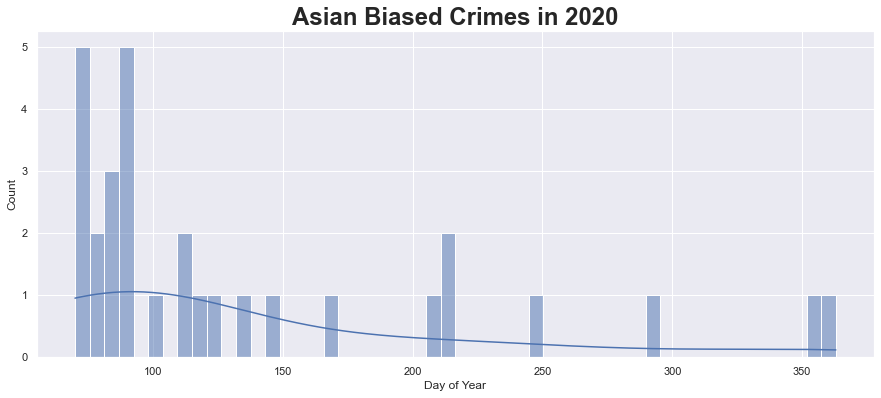

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(asian_analysis['Day of Year'], kde=True, bins=int(np.floor((365/7)))).set_title(f'Asian Biased Crimes in 2020', fontdict= { 'fontsize': 24, 'fontweight':'bold'})
plt.show()